MINOR PROJECT : DATA SCIENCE JANUARY MINOR PROJECT
                                  DONE BY: RITHU

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import style
style.use('ggplot')

In [ ]:
# to suppress warningss
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# setting the plot size for graphs:
plt.rcParams['figure.figsize'] = (8,6)

In [ ]:
#importing data
df = pd.read_csv('credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#DATA EXPLORATION

# shape and info of the data
df.shape

(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Summary Statistics for  the Numerical Variables: 
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Data Summary for continuous variables:

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(), 
        x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                     
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [ ]:
num_features = df.select_dtypes([np.number])

In [ ]:
num_features.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


In [ ]:
# Summary Statistics for Categorical Variables: 

df.describe(exclude=[np.number])

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


In [ ]:
# dropping Customer Id as is unique and not needed for model building:
df.drop('CUST_ID', axis=1, inplace=True)

In [ ]:

# Checking for Missing Values


count_missing = df.isnull().sum() 

percent_missing = (df.isnull().sum()/len(df))*100

missing_values = pd.concat([percent_missing,count_missing], axis=1,
                           keys=['Percent_of_Missing_Values', 'Count_of_Missing_Values'])
missing_values

,Percent_of_Missing_Values,Count_of_Missing_Values
BALANCE,0.000000,0
BALANCE_FREQUENCY,0.000000,0
PURCHASES,0.000000,0
ONEOFF_PURCHASES,0.000000,0
INSTALLMENTS_PURCHASES,0.000000,0
CASH_ADVANCE,0.000000,0
PURCHASES_FREQUENCY,0.000000,0
ONEOFF_PURCHASES_FREQUENCY,0.000000,0
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0
CASH_ADVANCE_FREQUENCY,0.000000,0


In [ ]:
# checking the value which is Null for Credit Limit
df[df['CREDIT_LIMIT'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [ ]:
# dropping off the missing value for Credit Limit

df = df.drop(5203)

In [ ]:
# resetting the index after dropping the record:
df = df.reset_index(drop=True)

In [ ]:
# Impute Using Median for Minimum Payments

df['MINIMUM_PAYMENTS']= df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [ ]:
# Checking again to confirm if missing values are present or not:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:

#To check for outliers of numerical columns, plotting box plot for each of the variable.

num_vars = df.columns
num_vars

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

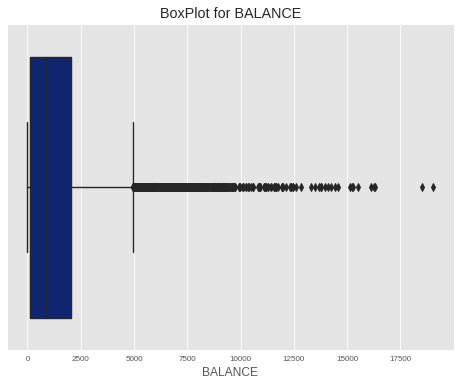

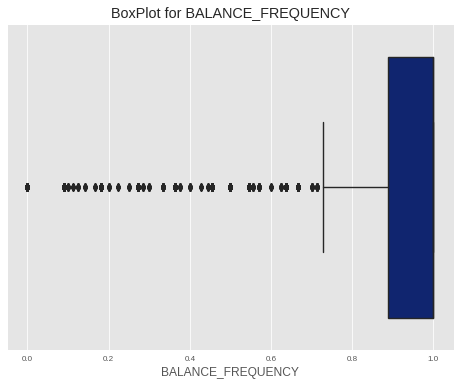

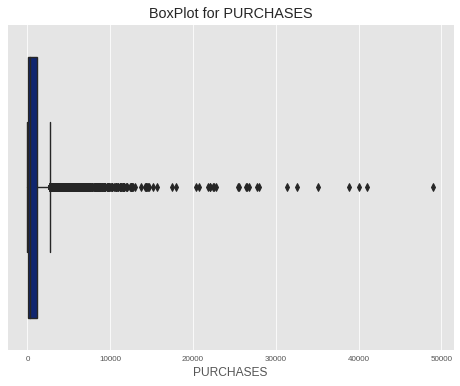

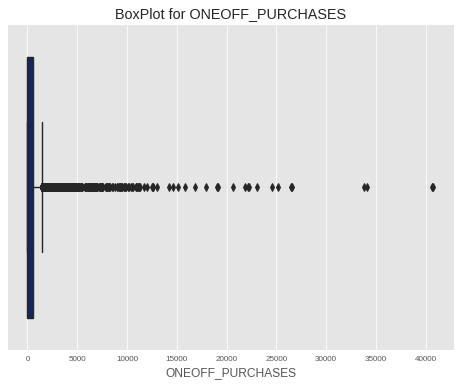

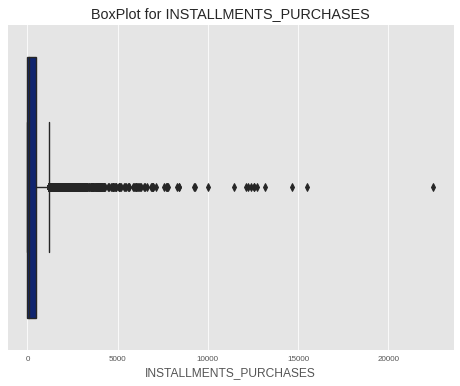

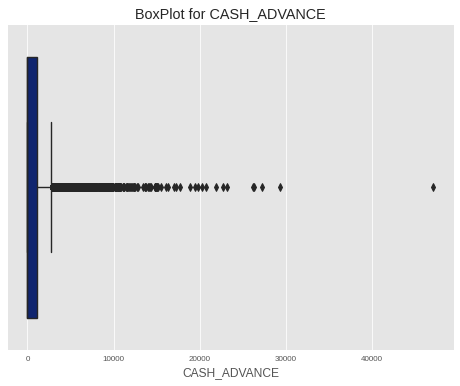

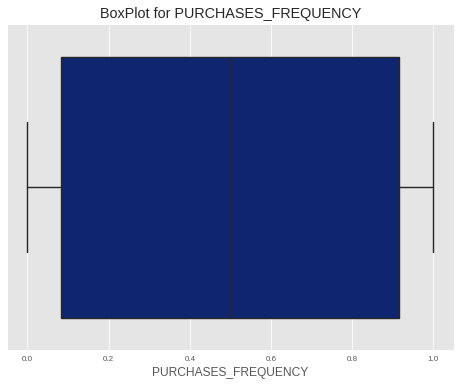

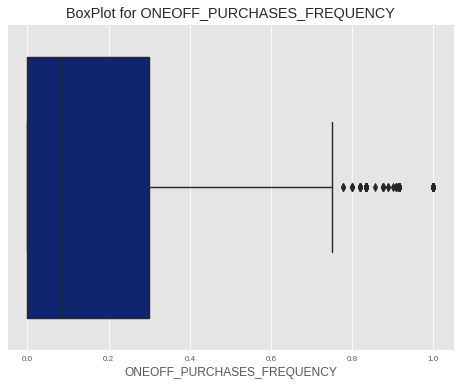

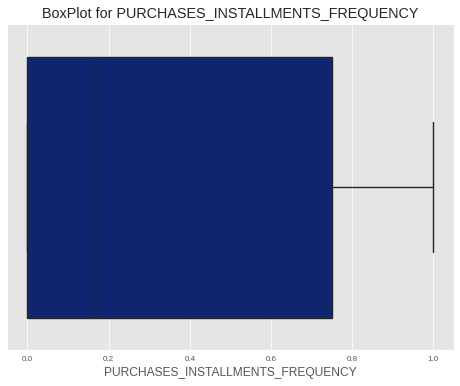

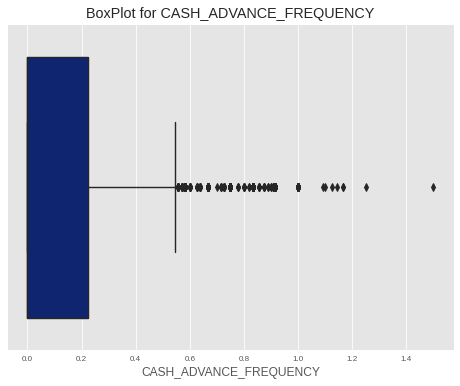

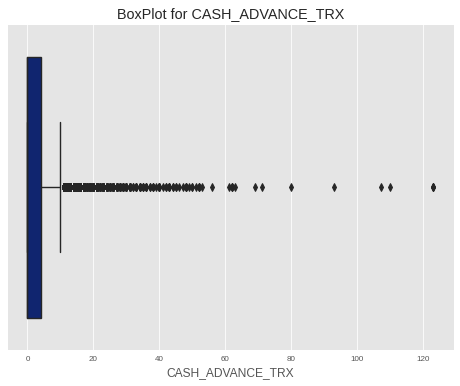

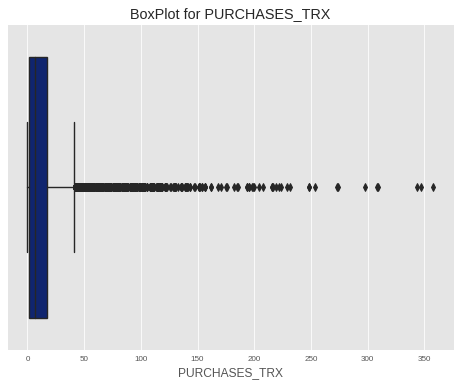

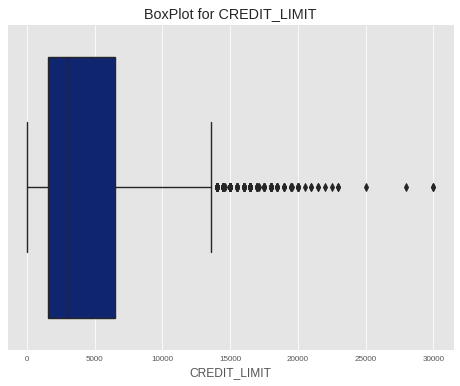

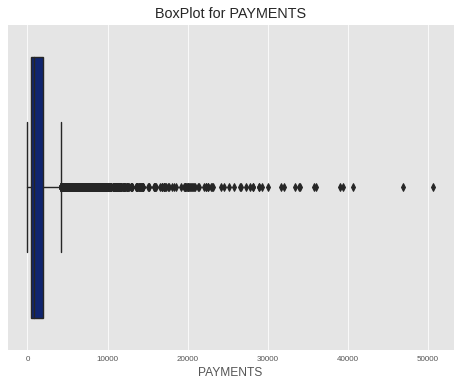

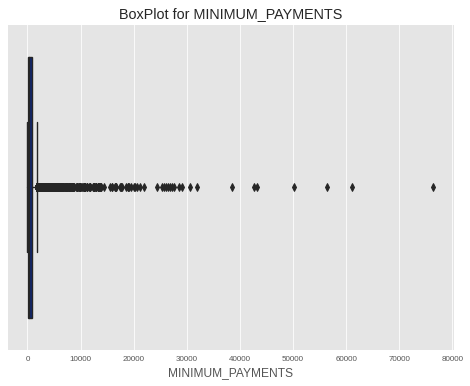

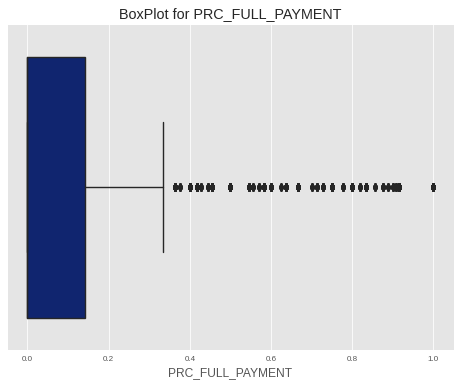

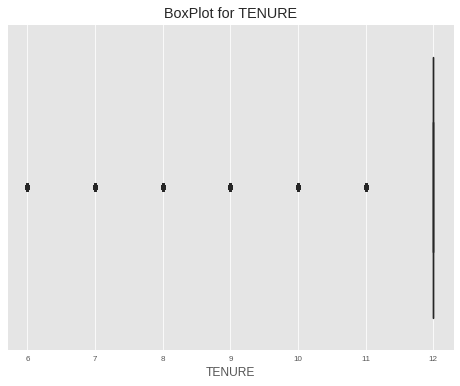

In [ ]:
# Box Plot:
for i in num_vars:
    sns.boxplot(df[i], palette='dark')
    plt.title('BoxPlot for {}'.format(i))
    plt.show()

In [ ]:
#From the above boxplots, can see there are outliers present. 


# transforming the data by applying PowerTransformer to treat for outliers. 
#By using IQR Method or Z-score to cap the outliers would have deleted those respective values. 
#Hence, transforming the data.

from sklearn.preprocessing import PowerTransformer

In [ ]:
PT = PowerTransformer()

print(PT.fit_transform(df))

[[-1.23833786 -1.0801604  -0.36831098 ... -0.82502551 -0.67793662
   0.42210751]
 [ 1.05188287 -0.4256199  -1.50536123 ...  0.91748237  1.23484635
   0.42210751]
 [ 0.86050618  0.62852726  0.52149237 ...  0.4759187  -0.67793662
   0.42210751]
 ...
 [-1.40957025 -0.9921333  -0.21655169 ... -1.30177584  1.32828513
  -2.52719186]
 [-1.55874115 -0.9921333  -1.50536123 ... -1.66214063  1.32828513
  -2.52719186]
 [-0.32454944 -1.6469605   0.70189133 ... -1.23886969 -0.67793662
  -2.52719186]]


In [ ]:
df.shape

(8949, 17)

In [ ]:
#Building KPIs to understand customer profiles
#1. Monthly Average Purchase

print('The average monthly purchase for the customers are as follows:')

Monthly_Avg_Purchase = df['PURCHASES']/df['TENURE']

print(Monthly_Avg_Purchase)

The average monthly purchase for the customers are as follows:
0         7.950000
1         0.000000
2        64.430833
3       124.916667
4         1.333333
           ...    
8944     48.520000
8945     50.000000
8946     24.066667
8947      0.000000
8948    182.208333
Length: 8949, dtype: float64


In [ ]:
# adding Monthly Average Purchase to the df 
df['Monthly_Avg_Purchase'] = df['PURCHASES']/df['TENURE']


In [ ]:
#2. Monthly Average Cash Advance Amount

print('The average monthly cash advance for the customers are as follows:')

Monthly_Avg_Cash = df['CASH_ADVANCE']/df['TENURE']

print(Monthly_Avg_Cash)

The average monthly cash advance for the customers are as follows:
0         0.000000
1       536.912124
2         0.000000
3        17.149001
4         0.000000
           ...    
8944      0.000000
8945      0.000000
8946      0.000000
8947      6.093130
8948     21.173335
Length: 8949, dtype: float64


In [ ]:
# adding Monthly Average Cash Advance Amount to the df 
df['Monthly_Avg_Cash'] = df['CASH_ADVANCE']/df['TENURE']

In [ ]:
#3. Division of Customers based on the type of Purchases (One-Off, Installments)
#how the customers spend on the basis of the type of purchases: One-Off purchase, do they make purchases on installments. They are spender of both the categories or none.

# Step 1: Seperating the Type of Purchases data in another datframe:
df_purchases = df[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]
df_purchases

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8944,0.00,291.12
8945,0.00,300.00
8946,0.00,144.40
8947,0.00,0.00


In [ ]:
df_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ONEOFF_PURCHASES        8949 non-null   float64
 1   INSTALLMENTS_PURCHASES  8949 non-null   float64
dtypes: float64(2)
memory usage: 140.0 KB


In [ ]:
# Step 2: Filtering on the categories and taking the count of those categories:

# 1:
df_purchases[(df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] == 0)].shape

(2041, 2)

In [ ]:
# 2:
df_purchases[(df_purchases['ONEOFF_PURCHASES'] > 0) & (df_purchases['INSTALLMENTS_PURCHASES'] == 0)].shape

(1874, 2)

In [ ]:
# 3.
df_purchases[(df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0)].shape

(2260, 2)

In [ ]:
# 4.
df_purchases[(df_purchases['ONEOFF_PURCHASES'] > 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0)].shape

(2774, 2)

 8949 customers have credit card are divided into 4 parts. 

The 4 categories based on purchase type are:

1) Both_the_Purchases
2) Installment_Purchases
3) None_Of_the_Purchases
4) One_Of_Purchase

In [ ]:
df['Purchase_Type'] = np.where((df['ONEOFF_PURCHASES'] == 0) & (df['INSTALLMENTS_PURCHASES'] == 0),'None_Of_the_Purchases',
                    np.where((df['ONEOFF_PURCHASES'] > 0) & (df['INSTALLMENTS_PURCHASES'] == 0), 'One_Of_Purchase',
np.where((df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0),'Installment_Purchases','Both_the_Purchases')))

In [ ]:
# Purchase Type Categories are as follows:
df['Purchase_Type'] .value_counts()

Both_the_Purchases       2774
Installment_Purchases    2260
None_Of_the_Purchases    2041
One_Of_Purchase          1874
Name: Purchase_Type, dtype: int64

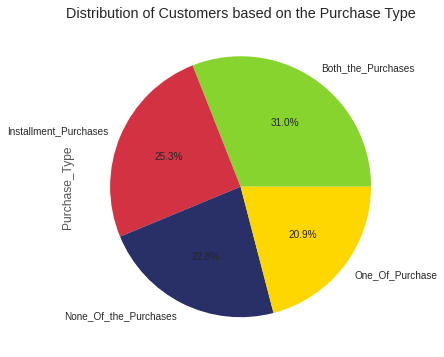

In [ ]:
# Plotting the distribution of customer on basis of Purhcase Type
df['Purchase_Type'].value_counts().sort_index().plot(kind='pie',autopct='%1.01f%%', 
                     colors =['#87d42f','#d33243','#292f67','#FFD700'],fontsize=10,textprops = {'fontsize': 18})
plt.title('Distribution of Customers based on the Purchase Type')
plt.show()

31% of the customers make purchases for both the types: One Off and Installment Purchases followed by 25.3% customer who make only installment purchases.


Average Amount per purchase transaction and average amount per cash-advance transaction is provided to us in the data in attributes as PURCHASES_TRX and CASH_ADVANCE_TRX.


5. Estimating the Limit Usage of customers
Computing the ratio of balance to credit limit to estimate the balance-to-limit ratio for each customer. Balance-to-Limit-ratio is also known as the utilization rate. A higher utilization rate indicates presense of credit risk. Hence, a lower utilization rate (balance-to-limit ratio) is desirable.

In [ ]:
df['Limit_Usage'] = df['BALANCE']/df['CREDIT_LIMIT']
df['Limit_Usage']

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8944    0.028494
8945    0.019183
8946    0.023399
8947    0.026915
8948    0.310590
Name: Limit_Usage, Length: 8949, dtype: float64

In [ ]:
#6. Payments to Minimum_Payments Ratio
df['Pay_to_MinimumPay'] = df['PAYMENTS']/df['MINIMUM_PAYMENTS']
df['Pay_to_MinimumPay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8944    6.660231
8945    0.882891
8946    0.986076
8947    0.942505
8948    0.715439
Name: Pay_to_MinimumPay, Length: 8949, dtype: float64

Insights using KPIs
To gain insights on the customer profiles, explore the data using the Purchase_Type feature over other attributes to understand how the customers behave.


In [ ]:
# average of Pay_to_MinimumPay for each of the Purchase Type 

t1 = df.groupby(by=['Purchase_Type'])['Pay_to_MinimumPay'].mean().sort_values(ascending=False)
t1

Purchase_Type
Installment_Purchases    13.258996
None_Of_the_Purchases    10.092080
Both_the_Purchases        7.236979
One_Of_Purchase           5.571042
Name: Pay_to_MinimumPay, dtype: float64

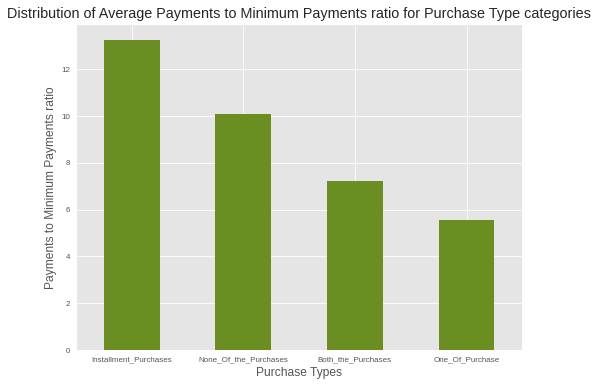

In [ ]:
# Plot the graph

t1.plot(kind='bar',color='olivedrab')
plt.title('Distribution of Average Payments to Minimum Payments ratio for Purchase Type categories')
plt.xlabel('Purchase Types')
plt.ylabel('Payments to Minimum Payments ratio')
plt.xticks(rotation=0)
plt.show()

Inference:
Customers who made the installment purchases paid the highest average minimum payment dues.

In [ ]:
# Balance to Credit Limit ratio (or Utilization rate) over Purchase Type
#Find the average of Limit Usage i.e of the credit card score for each of the Purchase Type:

t2 = df.groupby(['Purchase_Type'])['Limit_Usage'].mean().sort_values(ascending = True).reset_index()
t2

,Purchase_Type,Limit_Usage
0,Installment_Purchases,0.271678
1,Both_the_Purchases,0.353548
2,One_Of_Purchase,0.381074
3,None_Of_the_Purchases,0.574049


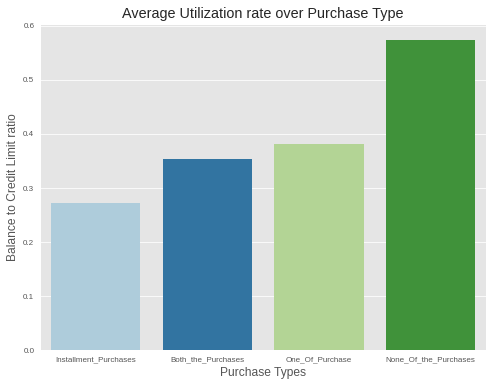

In [ ]:
# Plot the graph of Average Utilization rate over Purchase type

sns.barplot(t2['Purchase_Type'], t2['Limit_Usage'], palette='Paired')
plt.title('Average Utilization rate over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Balance to Credit Limit ratio')
plt.show()



A lower balance-to-limit ratio is desirable which indicates there is low credit risk. The customers who make installment purchases have the lowest utilization rate.

In [ ]:
# Monthly_Avg_Purchase over Purchase Type
df1 = df.copy()
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Purchase_Type,Limit_Usage,Pay_to_MinimumPay
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installment_Purchases,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,None_Of_the_Purchases,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,One_Of_Purchase,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12,124.916667,17.149001,One_Of_Purchase,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,One_Of_Purchase,0.681429,2.771075


In [ ]:
df1.shape

(8949, 22)

In [ ]:
# Find the average of Monthly Average Purchase for each Purchase Type

t3 = df.groupby(by=['Purchase_Type'])['Monthly_Avg_Purchase'].mean().sort_values(ascending=False) 
t3

Purchase_Type
Both_the_Purchases       192.685172
One_Of_Purchase           69.688958
Installment_Purchases     46.974347
None_Of_the_Purchases      0.000000
Name: Monthly_Avg_Purchase, dtype: float64

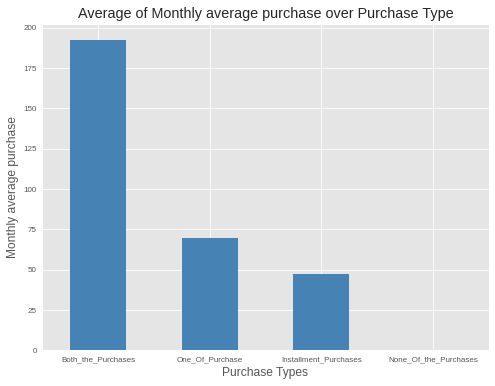

In [ ]:
#  Plot the graph

t3.plot(kind='bar',color='steelblue')
plt.title('Average of Monthly average purchase over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Monthly average purchase')
plt.xticks(rotation=0)
plt.show()

Inference:
The customers who made both the one off and installment purchases have made the highhest total average purchase amount over the last 12 months.

In [ ]:
# Monthly_Cash_Advance over Purchase Type
# Find the average of Monthly Average Cash Advance for each Purchase Type

t4 = df.groupby(['Purchase_Type'])['Monthly_Avg_Cash'].mean().sort_values(ascending=False).reset_index()
t4

,Purchase_Type,Monthly_Avg_Cash
0,None_Of_the_Purchases,182.932504
1,One_Of_Purchase,78.995966
2,Both_the_Purchases,67.821985
3,Installment_Purchases,38.398206


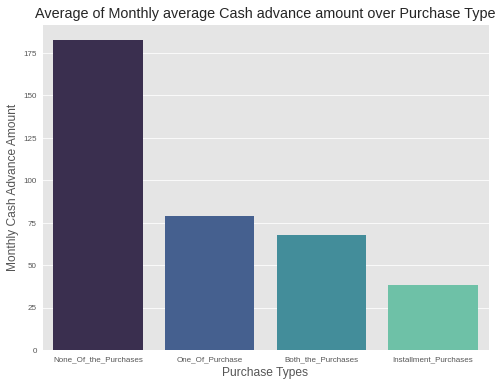

In [ ]:
#  Plot the graph:

sns.barplot(t4['Purchase_Type'], t4['Monthly_Avg_Cash'], palette='mako')
plt.title('Average of Monthly average Cash advance amount over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Monthly Cash Advance Amount')
plt.show()


The customers who made neither the one off purchase nor the installments purchase have made the highest monthly average cash in advance amount.


Dropping the original variables 'BALANCE','PURCHASES','PAYMENTS','MINIMUM_PAYMENTS','TENURE','CASH_ADVANCE' which were used to create the new variables. These variables will be correlated with derived variables increasing the redudancy in the data.

In [ ]:
df.drop(['BALANCE','CREDIT_LIMIT','PURCHASES','PAYMENTS','MINIMUM_PAYMENTS','TENURE','CASH_ADVANCE'], axis=1, inplace=True)

In [ ]:
corr_df = df.corr()
corr_df

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
BALANCE_FREQUENCY,1.000000,0.104257,0.124204,0.229440,0.202295,0.175869,0.192022,0.141516,0.189527,-0.095308,0.131188,0.085963,0.404557,-0.089340
ONEOFF_PURCHASES,0.104257,1.000000,0.330610,0.264913,0.524881,0.127699,-0.082622,-0.046226,0.545514,0.132745,0.913059,-0.034557,-0.042254,0.010298
INSTALLMENTS_PURCHASES,0.124204,0.330610,1.000000,0.442398,0.214016,0.511334,-0.132312,-0.074017,0.628097,0.182548,0.677016,-0.067799,-0.058318,0.020618
PURCHASES_FREQUENCY,0.229440,0.264913,0.442398,1.000000,0.501305,0.862921,-0.308483,-0.203541,0.568408,0.305761,0.395310,-0.215846,-0.201944,0.011399
ONEOFF_PURCHASES_FREQUENCY,0.202295,0.524881,0.214016,0.501305,1.000000,0.142270,-0.111707,-0.069116,0.544849,0.157497,0.499694,-0.089059,-0.092089,-0.004556
PURCHASES_INSTALLMENTS_FREQUENCY,0.175869,0.127699,0.511334,0.862921,0.142270,1.000000,-0.262955,-0.169250,0.529949,0.250049,0.314106,-0.179373,-0.161536,0.017915
CASH_ADVANCE_FREQUENCY,0.192022,-0.082622,-0.132312,-0.308483,-0.111707,-0.262955,1.000000,0.799573,-0.131161,-0.249768,-0.116102,0.628321,0.360168,-0.021861
CASH_ADVANCE_TRX,0.141516,-0.046226,-0.074017,-0.203541,-0.069116,-0.169250,0.799573,1.000000,-0.066180,-0.169807,-0.065716,0.633291,0.252596,-0.016119
PURCHASES_TRX,0.189527,0.545514,0.628097,0.568408,0.544849,0.529949,-0.131161,-0.066180,1.000000,0.162037,0.682573,-0.083411,-0.043794,0.013472
PRC_FULL_PAYMENT,-0.095308,0.132745,0.182548,0.305761,0.157497,0.250049,-0.249768,-0.169807,0.162037,1.000000,0.181755,-0.151386,-0.415701,0.018459


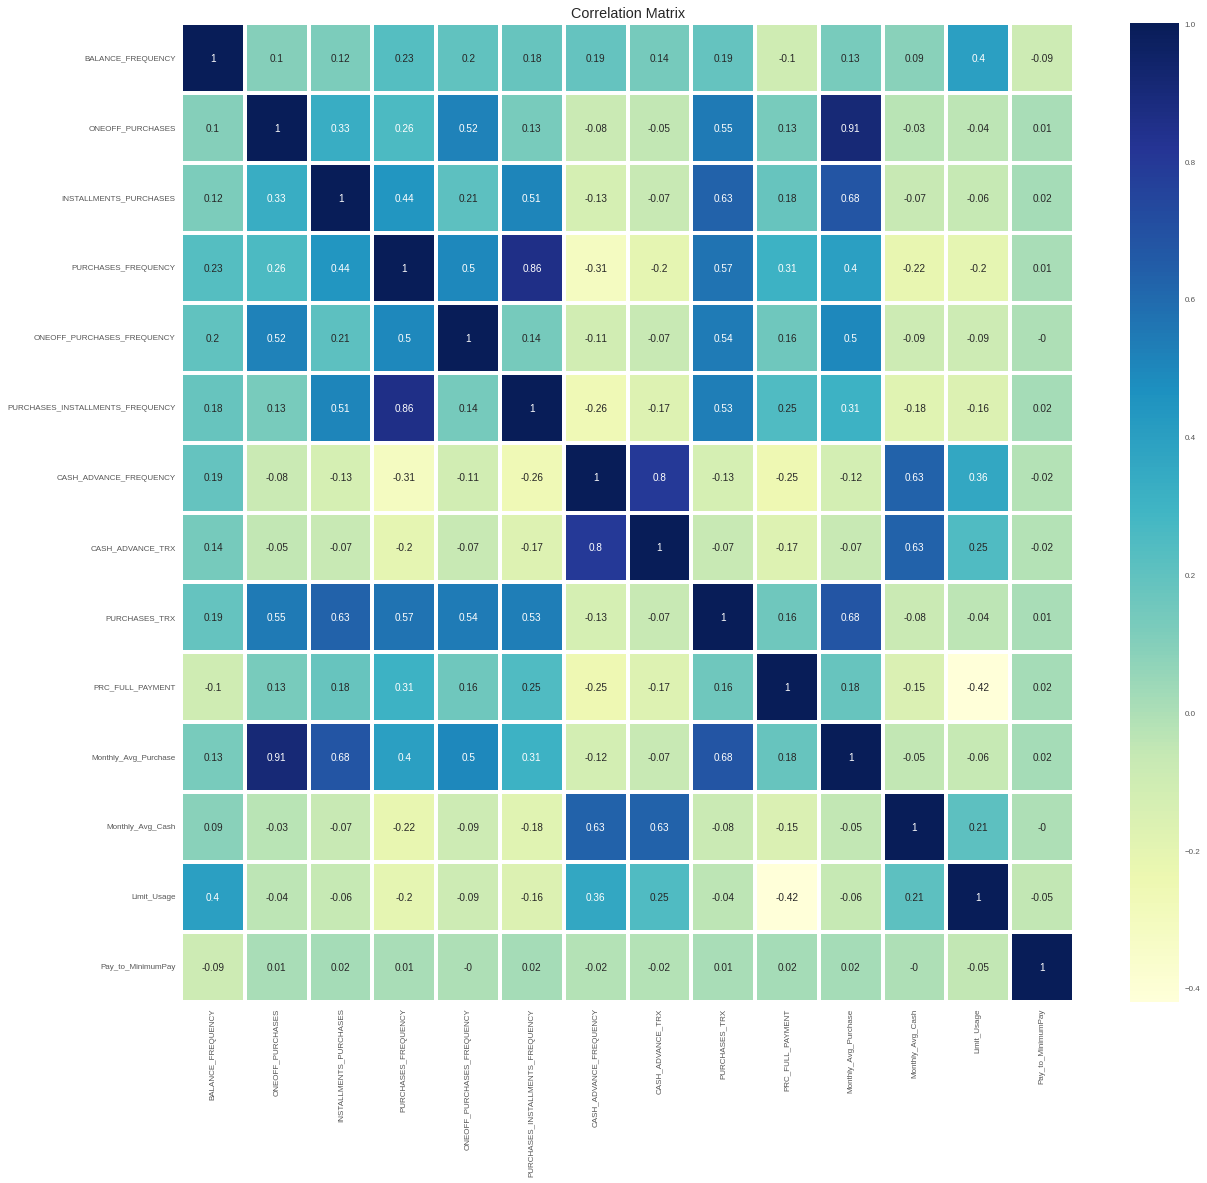

In [ ]:
#finding Correlation among the variables:

plt.figure(figsize=(20,18))
sns.heatmap(round(df.corr(),2),annot=True, cmap='YlGnBu', linewidths=3, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

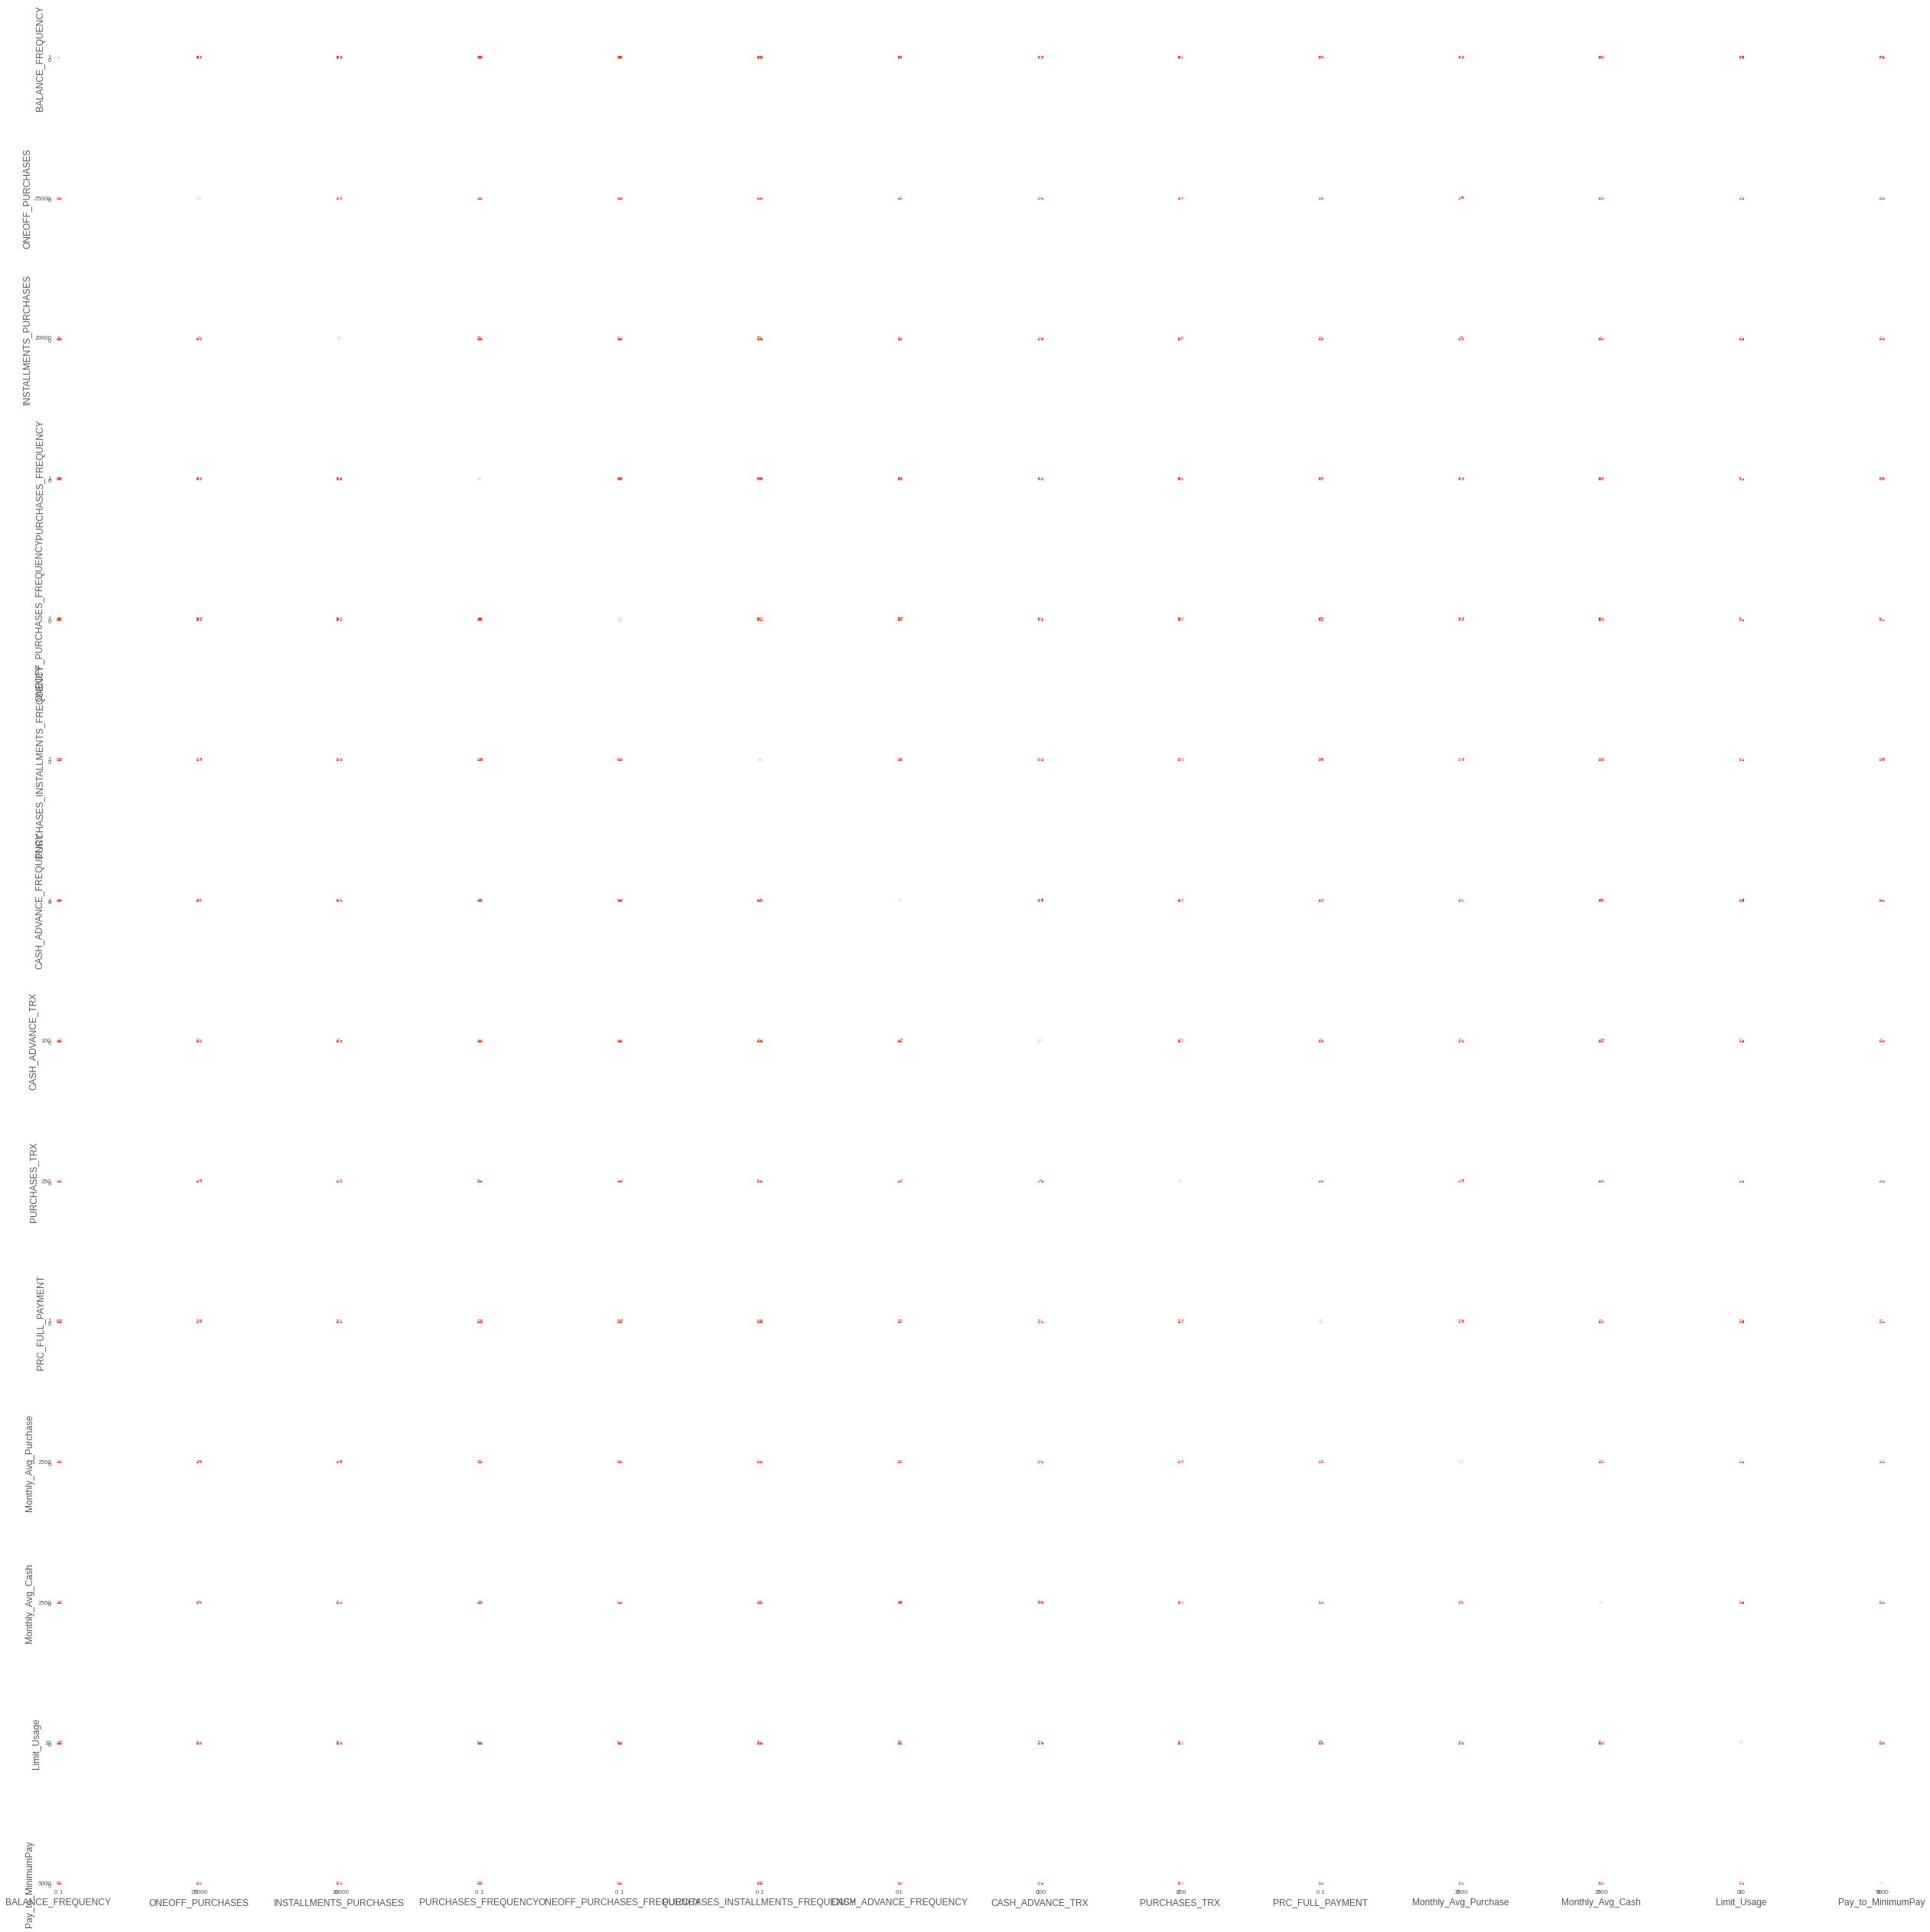

In [ ]:
# Plotting Pair Plot 
sns.pairplot(df)
plt.show()

In [ ]:
#Preparing the data for Modeling
# Creating dummy variables for Purchase_Type 

x_cat = pd.get_dummies(df['Purchase_Type'], drop_first=True)
x_cat

# using drop_first = True as will create one dimension less and the 4th category can be computed using the first 3 categories

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8944,1,0,0
8945,1,0,0
8946,1,0,0
8947,0,1,0


In [ ]:
#Preparing the data for Modeling
# Creating dummy variables for Purchase_Type 

x_cat = pd.get_dummies(df['Purchase_Type'], drop_first=True)
x_cat

# using drop_first = True as will create one dimension less and the 4th category can be computed using the first 3 categories

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8944,1,0,0
8945,1,0,0
8946,1,0,0
8947,0,1,0


In [ ]:
# Filtering out the Numerical variables:

x_num = df.dtypes[df.dtypes != 'object'].index.to_list()
x_num

['BALANCE_FREQUENCY',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'PRC_FULL_PAYMENT',
 'Monthly_Avg_Purchase',
 'Monthly_Avg_Cash',
 'Limit_Usage',
 'Pay_to_MinimumPay']

In [ ]:
# Filtering out the Numerical variables in the original df from df1 (Copy ofdf):

x_num_df1 = df1.dtypes[df1.dtypes != 'object'].index.to_list()
x_num_df1

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Monthly_Avg_Purchase',
 'Monthly_Avg_Cash',
 'Limit_Usage',
 'Pay_to_MinimumPay']

In [ ]:
# Original Variables Concatenated with dummy variables but without Scaling the Numerical variables :

original_df = pd.concat([x_cat, df1[x_num_df1]], axis=1)
original_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,1,0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508
1,0,1,0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241
2,0,0,1,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682
3,0,0,1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12,124.916667,17.149001,0.222223,0.000000
4,0,0,1,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075


In [ ]:
# Scaling the numerical variables

from sklearn.preprocessing import StandardScaler 

In [ ]:
SS = StandardScaler()

x_scaled = pd.DataFrame(SS.fit_transform(df[x_num]), columns=x_num)
x_scaled.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,-0.249881,-0.356957,-0.349114,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.525588,-0.433418,-0.460737,-0.893059,-0.064423
1,0.134049,-0.356957,-0.454607,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.234159,-0.477461,2.319245,0.175953,-0.044287
2,0.517980,0.108843,-0.454607,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,-0.525588,-0.120516,-0.460737,-0.144316,-0.068272
3,-1.017743,0.546123,-0.454607,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,-0.525588,0.214573,-0.371944,-0.427774,-0.076663
4,0.517980,-0.347317,-0.454607,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.525588,-0.470074,-0.460737,0.750582,-0.053215


In [ ]:
# Combining the Categorical and Numerical dataset

concat_df = pd.concat([x_cat, x_scaled], axis=1)
concat_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,1,0,0,-0.249881,-0.356957,-0.349114,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.525588,-0.433418,-0.460737,-0.893059,-0.064423
1,0,1,0,0.134049,-0.356957,-0.454607,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.234159,-0.477461,2.319245,0.175953,-0.044287
2,0,0,1,0.517980,0.108843,-0.454607,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,-0.525588,-0.120516,-0.460737,-0.144316,-0.068272
3,0,0,1,-1.017743,0.546123,-0.454607,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,-0.525588,0.214573,-0.371944,-0.427774,-0.076663
4,0,0,1,0.517980,-0.347317,-0.454607,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.525588,-0.470074,-0.460737,0.750582,-0.053215


Applying PCA
Will be performing Prinicipal Component Analysis(PCA) to reduce the dimensions.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Steps to perform PCA:
#Scaled the data:

concat_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,1,0,0,-0.249881,-0.356957,-0.349114,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.525588,-0.433418,-0.460737,-0.893059,-0.064423
1,0,1,0,0.134049,-0.356957,-0.454607,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.234159,-0.477461,2.319245,0.175953,-0.044287
2,0,0,1,0.517980,0.108843,-0.454607,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,-0.525588,-0.120516,-0.460737,-0.144316,-0.068272
3,0,0,1,-1.017743,0.546123,-0.454607,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,-0.525588,0.214573,-0.371944,-0.427774,-0.076663
4,0,0,1,0.517980,-0.347317,-0.454607,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.525588,-0.470074,-0.460737,0.750582,-0.053215


In [ ]:
#  Find the covariance Matrix:

cov_matrix = np.cov(concat_df.T)
print(cov_matrix.shape)
print('Covariance Matrix:', cov_matrix)

(17, 17)
Covariance Matrix: [[ 0.18878572 -0.05760378 -0.05289048 -0.05855883 -0.09015665  0.03540427
   0.12856082 -0.17142362  0.1868402  -0.1030289  -0.07341032 -0.02855805
   0.08574557 -0.05486451 -0.06615361 -0.07599021  0.00897372]
 [-0.05760378  0.17607385 -0.04776526  0.00518779 -0.08142023 -0.10369386
  -0.27862371 -0.15481222 -0.20909041  0.15684113  0.10204653 -0.13498277
  -0.08526858 -0.10890678  0.11095414  0.10835407  0.0019918 ]
 [-0.05289048 -0.04776526  0.1655753  -0.03628075  0.02451854 -0.09520935
  -0.08840125  0.08304779 -0.19206814 -0.00992445 -0.00972336 -0.06404633
  -0.03673949 -0.01913927 -0.01083133 -0.00422013 -0.00618309]
 [-0.05855883  0.00518779 -0.03628075  1.00011176  0.1042684   0.12421758
   0.22946609  0.20231737  0.17588838  0.19204378  0.14153225  0.18954776
  -0.09531866  0.13120311  0.08597276  0.40460218 -0.08935015]
 [-0.09015665 -0.08142023  0.02451854  0.1042684   1.00011176  0.33064653
   0.26494216  0.52493992  0.12771371 -0.0826314  -0.0

In [ ]:
#  Calculate the eigenvalues and eigenvectors:

eig_val, eig_vec = np.linalg.eig(cov_matrix)
print(len(eig_val))
print(eig_vec.shape)

17
(17, 17)


In [ ]:
print('Eigen Vectors:', eig_vec)
print('Eigen Values:', eig_val)

Eigen Vectors: [[-2.16214195e-02 -9.60677046e-02  1.67381856e-01  8.19928834e-02
  -3.57899991e-02  9.84994683e-02  2.44027882e-02  2.11899671e-01
   5.56474223e-02  3.60667634e-02  4.02520605e-02  1.48532851e-01
   2.33858365e-01  8.34225681e-01  3.69341072e-03  3.46267956e-01
  -2.16081494e-02]
 [ 1.11657548e-01  4.90282698e-02 -5.65895947e-02 -1.17156465e-02
  -3.87011677e-02  7.96232725e-02  1.32863134e-01 -6.48391206e-02
  -4.72425183e-02 -1.49445350e-04 -2.50198107e-01 -2.89863493e-01
  -4.53616465e-01  1.23152526e-02  5.81280017e-03  5.27284617e-01
   5.65031484e-01]
 [ 3.02717103e-02 -8.40584979e-03 -1.46726683e-01 -5.29253320e-02
   5.12449464e-02 -1.02322672e-01 -5.16997856e-02 -8.43400519e-02
  -4.57082809e-03 -3.69491736e-02  2.27176821e-01  3.25503001e-01
   5.61519210e-01 -3.70742145e-01 -4.02097658e-03  5.39101108e-01
   2.22381854e-01]
 [-7.17343323e-02  2.91641417e-01  3.20955201e-01 -4.22057416e-01
   9.44842223e-02 -2.96062607e-01  4.60078481e-01  4.64286783e-02
  -5

In [ ]:
# Making the Eigen Pairs:

eigen_pairs = [(eig_val[i], eig_vec[:,i]) for i in range(len(eig_val))]
eigen_pairs_sorted = sorted(eigen_pairs, reverse = True)

In [ ]:
#  Sort the Eigen Vectors and Eigen Values

eig_val_sorted = [eigen_pairs_sorted[i][0] for i in range(len(eig_val))]
eig_vec_sorted = [eigen_pairs_sorted[i][1] for i in range(len(eig_val))]

In [ ]:
#  Calculating Cumulative Variance Explained:

tot = np.sum(eig_val)
exp_var = [(i/tot)*100 for i in sorted(eig_val, reverse = True)]   # explained variance
tot_var = np.cumsum(exp_var)                                       # total variance explained
print('Cumulative Variance explained', tot_var)

Cumulative Variance explained [ 30.25572014  48.35375746  58.40942539  67.41000536  74.32002523
  80.61586649  85.38564319  88.64870161  91.63160722  94.46025558
  96.44612772  97.799846    98.89373187  99.5076423   99.77566598
  99.96929084 100.        ]


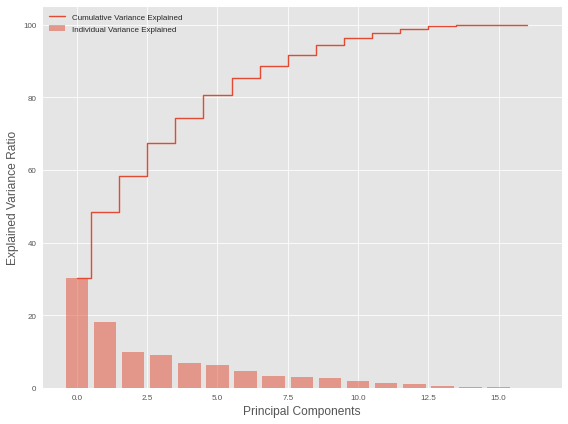

In [ ]:
# Plotting the Summary Plot of the Cumulative Variance Explained:

plt.bar(range(17), exp_var, alpha=0.50, align = 'center', label='Individual Variance Explained')
plt.step(range(17), tot_var, where ='mid', label='Cumulative Variance Explained')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
pca_model = PCA(n_components = 17)
X_PCA = pca_model.fit_transform(concat_df)

In [ ]:
X_PCA.shape

(8949, 17)

In [ ]:
# Cumulative Variance explained:
pca_var = pca_model.explained_variance_ratio_
np.cumsum(pca_var)

array([0.3025572 , 0.48353757, 0.58409425, 0.67410005, 0.74320025,
       0.80615866, 0.85385643, 0.88648702, 0.91631607, 0.94460256,
       0.96446128, 0.97799846, 0.98893732, 0.99507642, 0.99775666,
       0.99969291, 1.        ])

In [ ]:
# Cumulative Variance explains
var1 = np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals=6)*100)
var1

array([30.2557, 48.3537, 58.4094, 67.41  , 74.32  , 80.6158, 85.3856,
       88.6487, 91.6316, 94.4602, 96.4461, 97.7998, 98.8937, 99.5076,
       99.7756, 99.9692, 99.9999])

In [ ]:
# Summary table showing the Eigen Vectors, Eigen Values and the variance explained by each of the component(eigenvector)

vec_val = pd.DataFrame({'Eigen_Values':pca_model.explained_variance_, 'Cumulative_Variance':var1}, 
                       index=range(1,18)).round(4)
vec_val

,Eigen_Values,Cumulative_Variance
1,4.3968,30.2557
2,2.6300,48.3537
3,1.4613,58.4094
4,1.3080,67.4100
5,1.0042,74.3200
6,0.9149,80.6158
7,0.6931,85.3856
8,0.4742,88.6487
9,0.4335,91.6316
10,0.4111,94.4602


In [ ]:
# PCA with 8 components:

PCA_7 = PCA(n_components=7)
X_PCA_7 = PCA_7.fit_transform(concat_df)

In [ ]:
PC = pd.DataFrame(X_PCA_7, columns=['PC1 PC2 PC3 PC4 PC5 PC6 PC7'.split()])
PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.963797,-1.466063,0.395737,0.147147,0.113362,-0.452822,-0.161024
1,-2.209442,0.931402,0.333874,-0.799582,-0.191202,-0.214703,0.703046
2,1.007415,-0.162731,0.841429,1.325162,-0.822963,2.170478,-1.088306
3,-0.866781,-0.770916,1.725054,0.148277,0.109396,-0.527342,-0.380985
4,-1.306443,-0.603864,0.469885,1.500899,0.189492,0.023789,0.418797
...,...,...,...,...,...,...,...
8944,1.055194,-1.518576,-1.542865,-0.646465,-0.416310,0.319131,0.680914
8945,0.739634,-1.224406,-1.556767,0.090250,0.053046,-0.007028,-0.533323
8946,0.427028,-1.622618,-0.976104,-0.482658,-0.177350,-0.023084,-0.129768
8947,-1.473409,-0.962832,0.786342,-0.353589,-0.230467,-0.234425,0.658129


In [ ]:
# Taking out the list of columns:

list_cols = concat_df.columns

In [ ]:
PC_with_all_variables = pd.DataFrame(PCA_7.components_.T, columns = ['PC_'+str(i) for i in range(1,8)], index = list_cols)
PC_with_all_variables

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
Installment_Purchases,0.021621,-0.096068,-0.167382,-0.081993,0.035790,-0.098499,0.024403
None_Of_the_Purchases,-0.111658,0.049028,0.056590,0.011716,0.038701,-0.079623,0.132863
One_Of_Purchase,-0.030272,-0.008406,0.146727,0.052925,-0.051245,0.102323,-0.051700
BALANCE_FREQUENCY,0.071734,0.291641,-0.320955,0.422057,-0.094484,0.296063,0.460078
ONEOFF_PURCHASES,0.302709,0.226554,0.462988,0.056258,-0.002324,-0.048950,0.082206
INSTALLMENTS_PURCHASES,0.327399,0.139030,-0.110014,-0.097894,0.209276,-0.473947,0.131399
PURCHASES_FREQUENCY,0.381713,-0.011713,-0.371278,-0.051380,-0.081538,0.246192,-0.227260
ONEOFF_PURCHASES_FREQUENCY,0.288618,0.156734,0.248066,0.116115,-0.227363,0.538702,-0.269548
PURCHASES_INSTALLMENTS_FREQUENCY,0.331829,-0.030934,-0.525154,-0.119609,0.063193,-0.064535,-0.145781
CASH_ADVANCE_FREQUENCY,-0.218531,0.460878,-0.071948,-0.218216,-0.045807,0.043832,-0.008001


In [ ]:
# Exporting the output:
PC_with_all_variables.to_csv('PC_with_all_variables.csv')

In [ ]:
# Variance explained by each of the Component:

pd.Series(PCA_7.explained_variance_ratio_*100, index = ['PC_' + str(i) for i in range(1,8)])

PC_1    30.255720
PC_2    18.098037
PC_3    10.055668
PC_4     9.000580
PC_5     6.910020
PC_6     6.295841
PC_7     4.769777
dtype: float64

In [ ]:
Loadings = pd.DataFrame((pca_model.components_.T * np.sqrt(pca_model.explained_variance_)).T, index= list_cols,columns=['PC1 PC2 PC3 PC4 PC5 PC6 PC7 PC8 PC9 PC10 PC11 PC12 PC13 PC14 PC15 PC16 PC17'.split()])


In [ ]:
Loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Installment_Purchases,0.045337,-0.234129,-0.063475,0.150416,0.634734,0.686506,0.800394,0.605188,0.695793,-0.458226,-0.363837,0.799989,0.397881,0.781212,-0.345954,-0.277006,0.026433
None_Of_the_Purchases,-0.155796,0.079511,-0.013632,0.472963,0.367409,0.225470,-0.018996,0.254180,-0.050167,0.747419,0.731873,0.318451,-0.281613,0.383416,0.652968,0.520304,-0.056044
One_Of_Purchase,-0.202338,0.068408,0.177369,-0.387983,0.559677,-0.132989,-0.448815,0.299872,-0.634826,-0.086973,-0.111702,-0.003980,0.011179,0.378678,-0.053554,-0.187900,0.081477
BALANCE_FREQUENCY,-0.093772,0.013399,0.060529,0.482691,0.064340,-0.111957,-0.058762,0.132797,-0.136792,-0.249565,-0.384458,0.005601,-0.494393,-0.002493,-0.406731,0.569348,-0.248442
ONEOFF_PURCHASES,0.035864,0.038782,-0.051352,-0.094681,-0.002329,0.209712,-0.081708,-0.227836,0.063324,-0.045902,-0.080916,0.062850,-0.300698,0.084132,-0.053952,0.191233,0.856510
INSTALLMENTS_PURCHASES,-0.094216,-0.076160,0.097873,0.283187,-0.046821,-0.453336,0.235485,0.515274,-0.061728,0.041926,0.053425,-0.065455,0.167600,-0.225768,-0.005664,-0.075884,0.429228
PURCHASES_FREQUENCY,0.020317,0.110616,-0.043043,0.383040,0.068441,0.109397,-0.189206,-0.224413,-0.121370,-0.006661,-0.067098,-0.127673,0.587460,0.098056,-0.066537,0.157062,0.098556
ONEOFF_PURCHASES_FREQUENCY,0.145917,-0.044649,-0.058078,0.031971,0.360441,-0.346990,0.124928,-0.230718,0.189364,-0.049453,-0.025017,-0.222362,-0.068685,0.138047,0.123291,-0.000019,-0.000152
PURCHASES_INSTALLMENTS_FREQUENCY,0.036638,-0.031104,-0.003009,-0.359503,0.010052,-0.121312,0.074930,0.064939,0.052207,0.021556,0.021472,0.076626,0.219705,-0.041551,-0.048042,0.463820,-0.017563
CASH_ADVANCE_FREQUENCY,-0.023124,0.000096,0.023690,0.008576,-0.076290,0.052699,0.001043,0.067612,-0.042288,-0.234954,-0.267263,0.009204,0.023548,-0.027684,0.510362,0.080127,-0.001838


In [ ]:
# Exporting the output:
Loadings.to_csv('Loadings1.csv')

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

In [ ]:
# Step 1: Finding the Cophenetic Distance Correlation Coefficient for different Linkages

for i  in ['single', 'complete', 'average']:
    print('Linkage is', i)
    for j in ['euclidean', 'cityblock', 'cosine']:
            Z= linkage(X_PCA_7, method = i , metric = j)
            c , coph_dist = cophenet(Z, pdist(X_PCA_7))
            print('Cophenetic Distance Correlation Coefficient for', j, 'distance is\t:', c)
    print()
    
Z= linkage(X_PCA_7, 'ward')
c , coph_dist = cophenet(Z, pdist(X_PCA_7))
print('Cophenetic Distance Correlation Coefficient for ward linkage is \t:', c)

Linkage is single
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.7630936998688107
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.7516099250964815
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.0332067352490848

Linkage is complete
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.803293695300964
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.804782193826038
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.26890794541141255

Linkage is average
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.8598689038991882
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.869806244869372
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.3398016312224923

Cophenetic Distance Correlation Coefficient for ward linkage is 	: 0.3619897408064154


In [ ]:
# Step 2: Finding the Optimal clusters using KMeans, Silhouette Coefficient Score for both KMeans and Agglomerative Clustering

wcss = []
sil_kmeans = []
sil_agc = []

for i in range(3,9):
    
    # K-Means Clustering:
    kmeans = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 0)
    kmeans.fit(X_PCA_7)
    
     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(X_PCA_7, kmeans.labels_)
    sil_kmeans.append(sil_km)
    
    # Agglomerative Clusters and its Silhouette Score
    agc = AgglomerativeClustering(n_clusters = i, affinity = 'cityblock', linkage = 'average')
    agc.fit(X_PCA_7)
    sil_ag = silhouette_score(X_PCA_7, agc.labels_)
    sil_agc.append(sil_ag)
    
    print('Number of clusters:', i)
    print('KMeans Inertia', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print('Silhouette Score for AGC(HCA):', sil_ag)
    print()

Number of clusters: 3
KMeans Inertia 74229.6994039248
Silhouette Score for KMeans: 0.24784561379166523
Silhouette Score for AGC(HCA): 0.8499511136280253

Number of clusters: 4
KMeans Inertia 63708.48198506316
Silhouette Score for KMeans: 0.25984073654156464
Silhouette Score for AGC(HCA): 0.8276634947082336

Number of clusters: 5
KMeans Inertia 55828.66164055138
Silhouette Score for KMeans: 0.2887017139510505
Silhouette Score for AGC(HCA): 0.7930548693789233

Number of clusters: 6
KMeans Inertia 48750.07890336938
Silhouette Score for KMeans: 0.28855784749665525
Silhouette Score for AGC(HCA): 0.7907514561247028

Number of clusters: 7
KMeans Inertia 42422.40591665273
Silhouette Score for KMeans: 0.3023889650761613
Silhouette Score for AGC(HCA): 0.7550012654147571

Number of clusters: 8
KMeans Inertia 38669.582949106465
Silhouette Score for KMeans: 0.3074856699207035
Silhouette Score for AGC(HCA): 0.7545763220623827



In [ ]:
!pip install yellowbrick

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer


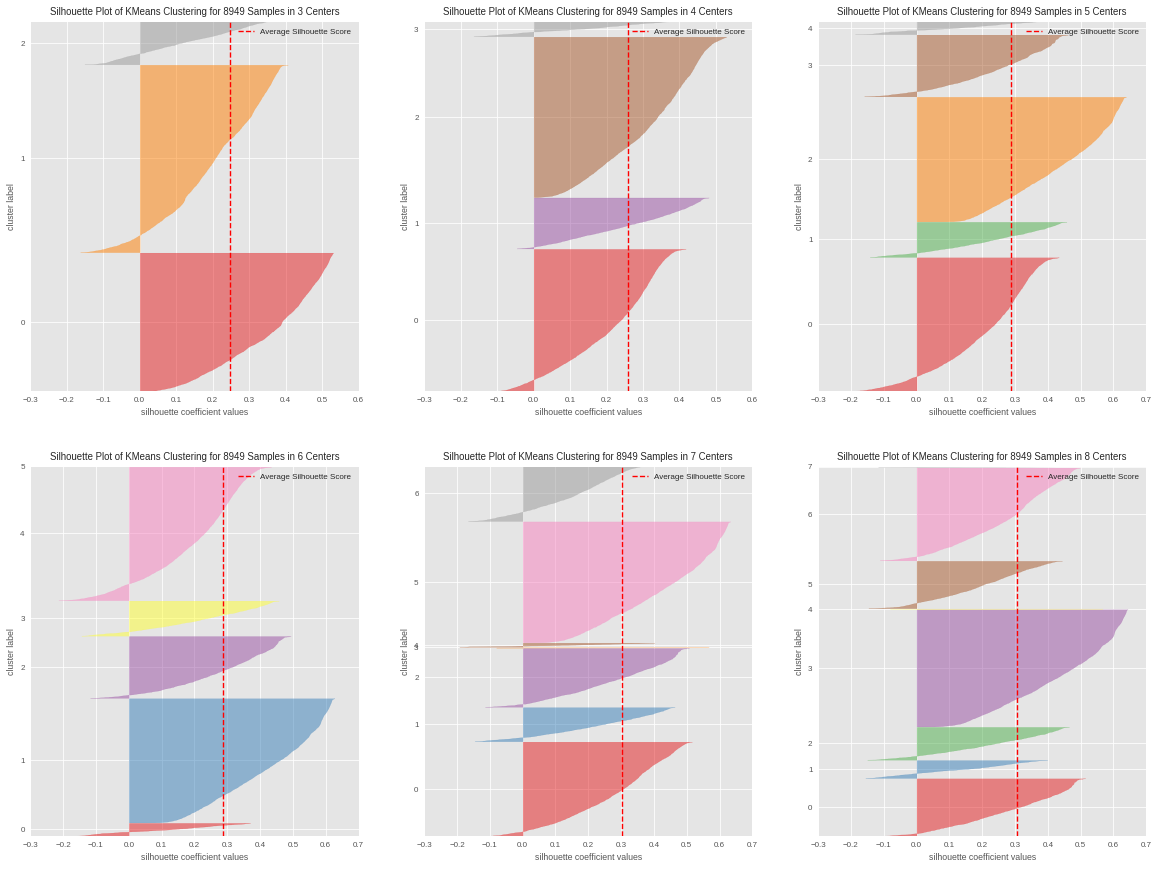

In [ ]:
plt.style.use('seaborn-paper')
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
axs = axs.reshape(6)
for i, k in enumerate(range(3, 9)):
    ax = axs[i]
    sil = SilhouetteVisualizer(KMeans(n_clusters = k, n_init = 100, init='k-means++', random_state = 0), ax=ax)
    sil.fit(X_PCA_7)
    sil.finalize()

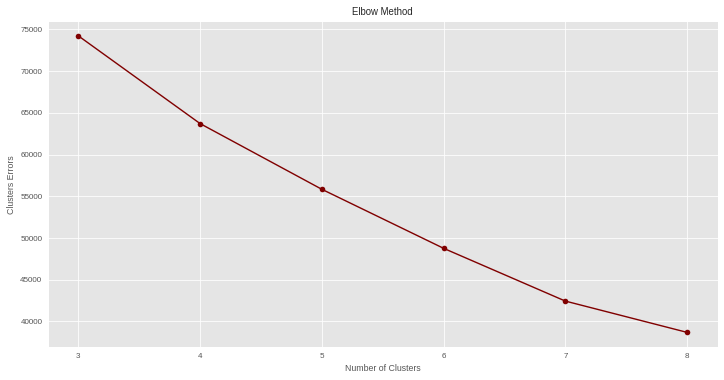

In [ ]:
# Plotting graph of Elbow Method 

plt.figure(figsize=(12,6))
plt.plot(range(3,9), wcss, c ='#800000', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clusters Errors')
plt.show()

# Inertia or Sum of Squared Errors within the Clusters is also known as the Cluster Errors

# CLuster error will decrease after some Clusters but 

Inference of Elbow Method:
The sum of squared distances of each data point within a cluster from its respective centroid is called the inertia. The K at which the inertia stops to drop significantly (using the above elbow method) is the best K.

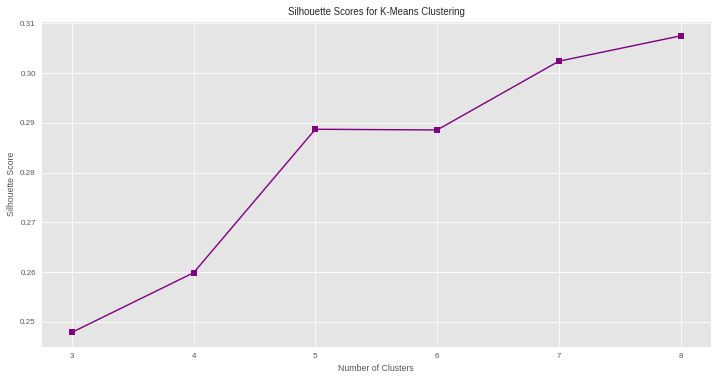

In [ ]:
# Plotting the Silhouette Score for the clusters found from K-Means and Agglomerative Clustering

plt.figure(figsize=(12,6))
plt.plot(range(3,9), sil_kmeans, marker='s', c='purple')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

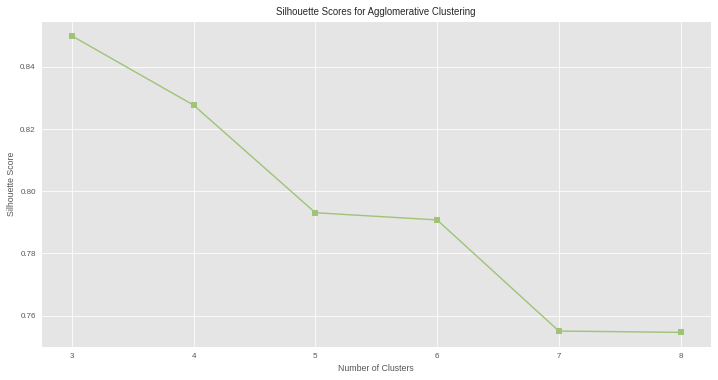

In [ ]:
# Plotting the Silhouette Score for the clusters found from K-Means and Agglomerative Clustering

plt.figure(figsize=(12,6))
plt.plot(range(3,9), sil_agc, marker='s', c='g')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

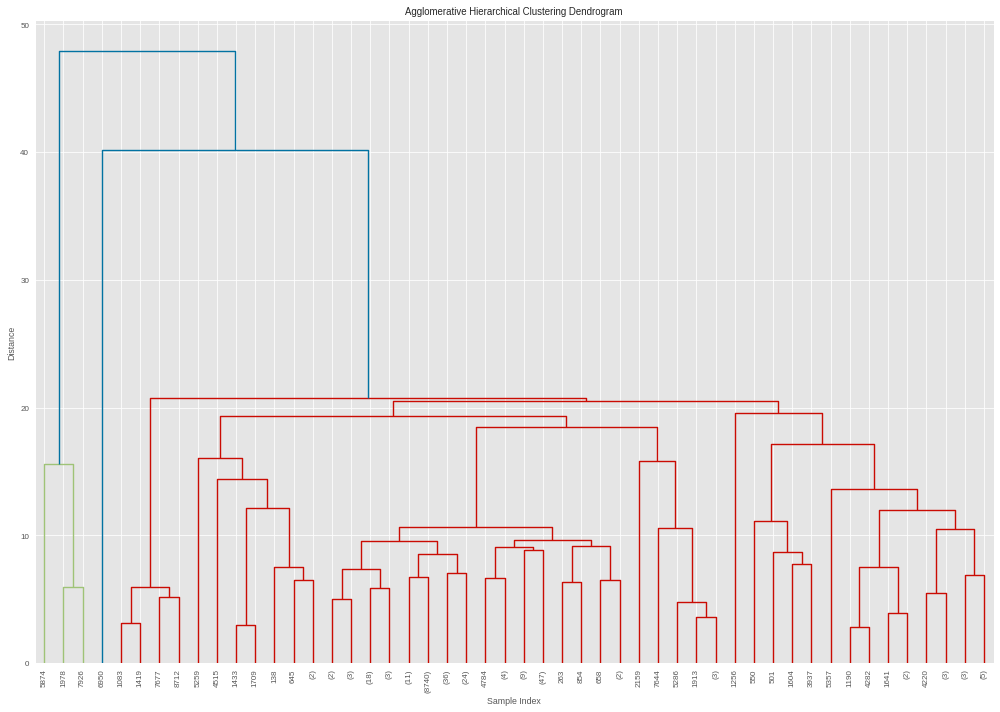

In [ ]:
# Plotting Dendrogram

Z= linkage(concat_df, method = 'average', metric = 'euclidean')
plt.figure(figsize=(14,10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, truncate_mode='level', p =9)
plt.tight_layout()
plt.show()

# p-value tells how the deep the Dendrogram goes. The lesser the p value then the values would be far away on the x-axis

Conclusion:
From the above Elbow method, Silhouette Coefficient Scores for K-Means & Agglomerative Clustering, and from Dendrogram, can see that the clusters 4 and 5 look similar.

We see that the Silhouette Scores for K = 5 is the highest (0.28857) and then the Silhouette Coefficient for K = 4 is 0.26015, which also gives the nearby score. The clusters K = 4 or K = 5 look very similar so now will use the other methods and best practices that is by finding out the Segment Distribution and performing Profiling, will check the similarities and dissimilarities between the segments and see which cluster is giving the best solution.

Scatter plot for Principal Components 0 and 1


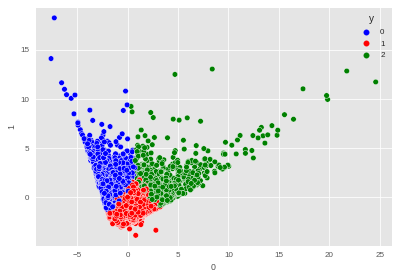

Scatter plot for Principal Components 1 and 2


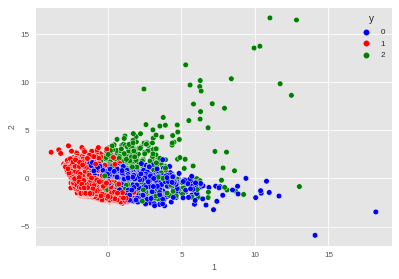

Scatter plot for Principal Components 2 and 3


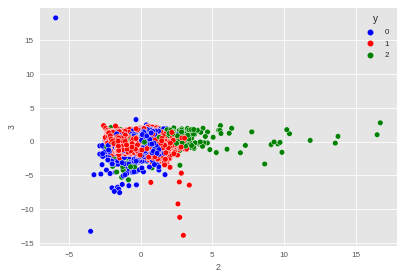

Scatter plot for Principal Components 3 and 4


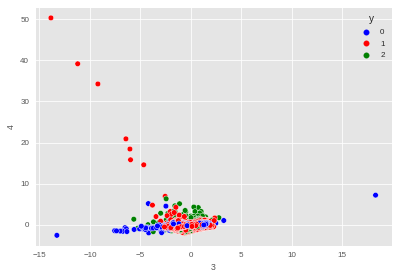

Scatter plot for Principal Components 4 and 5


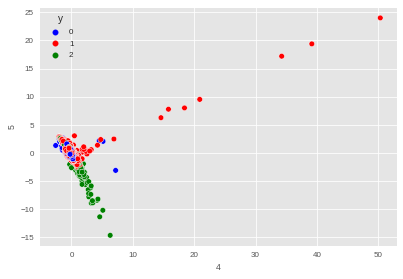

Scatter plot for Principal Components 5 and 6


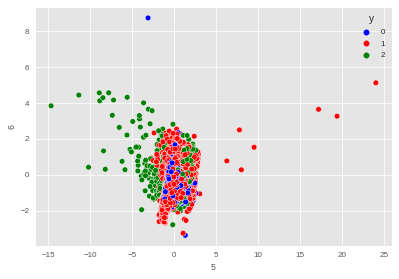

In [ ]:
### Applying Clustering and visualizing the spread of the data (finding out if the data points have been clustered correctly through visualization)

#K-Means Clusters:   For K= 3
kmeans = KMeans(n_clusters = 3, n_init = 100, init='k-means++', random_state = 0)
kmeans.fit(X_PCA_7)

# Taking into each dataframes
df_pca = pd.DataFrame(X_PCA_7)
y_lab = pd.Series(kmeans.labels_, name = 'y') # labels for clusters

#concatenating the dataframe:
df_final = pd.concat([df_pca, y_lab], axis = 1)

# As there are 7 dimensions, hence we need to plot for each of the different pairs to visualize the spread of the data:

for i in range(6):
    print('Scatter plot for Principal Components', i, 'and', i+1)
    sns.scatterplot(df_pca[i], df_pca[i+1], hue = df_final['y'], palette = ['blue', 'red', 'green'])
    plt.show()

Scatter plot for Principal Components 0 and 1


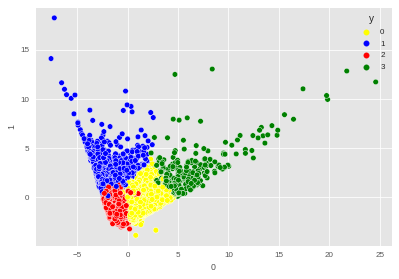

Scatter plot for Principal Components 1 and 2


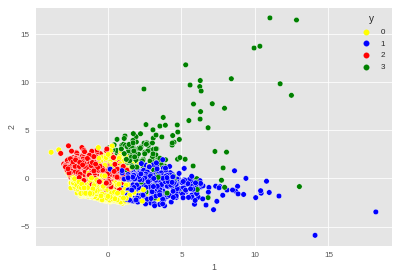

Scatter plot for Principal Components 2 and 3


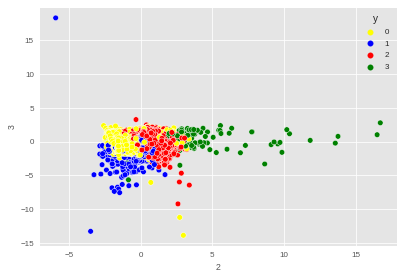

Scatter plot for Principal Components 3 and 4


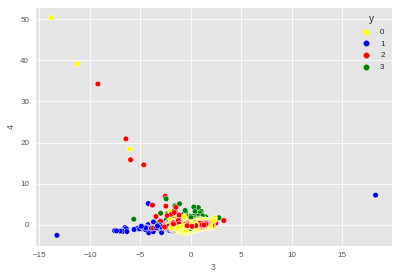

Scatter plot for Principal Components 4 and 5


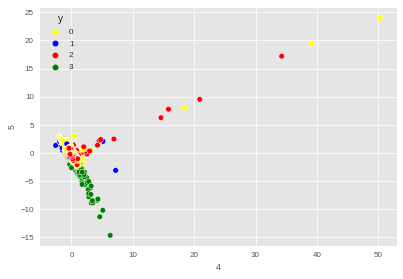

Scatter plot for Principal Components 5 and 6


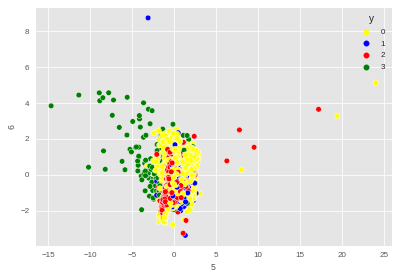

In [ ]:
### Applying Clustering and visualizing the spread of the data (finding out if the data points have been clustered correctly through visualization)

#K-Means Clusters:   For K= 4
kmeans = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 0)
kmeans.fit(X_PCA_7)

# Taking into each dataframes
df_pca = pd.DataFrame(X_PCA_7)
y_lab = pd.Series(kmeans.labels_, name = 'y') # labels for clusters

#concatenating the dataframe:
df_final = pd.concat([df_pca, y_lab], axis = 1)

# As there are 7 dimensions, hence we need to plot for each of the different pairs to visualize the spread of the data:

for i in range(6):
    print('Scatter plot for Principal Components', i, 'and', i+1)
    sns.scatterplot(df_pca[i], df_pca[i+1], hue = df_final['y'], palette = ['yellow', 'blue', 'red', 'green'])
    plt.show()

Scatter plot for Principal Components 0 and 1


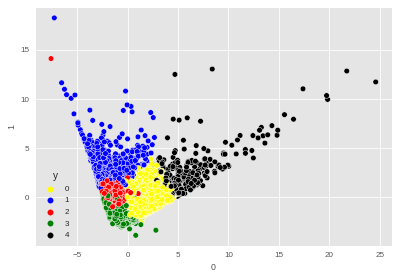

Scatter plot for Principal Components 1 and 2


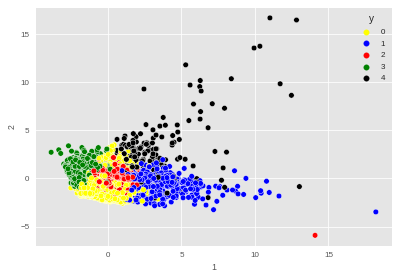

Scatter plot for Principal Components 2 and 3


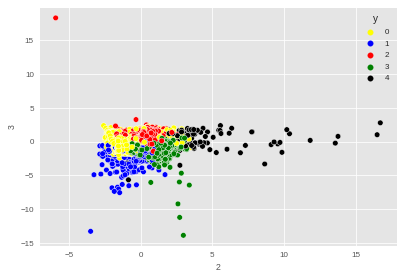

Scatter plot for Principal Components 3 and 4


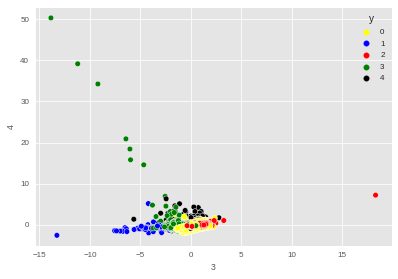

Scatter plot for Principal Components 4 and 5


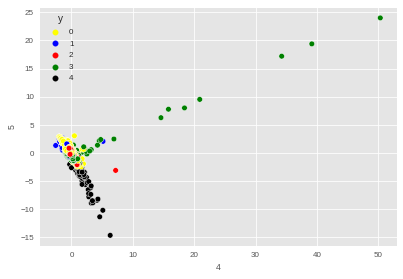

Scatter plot for Principal Components 5 and 6


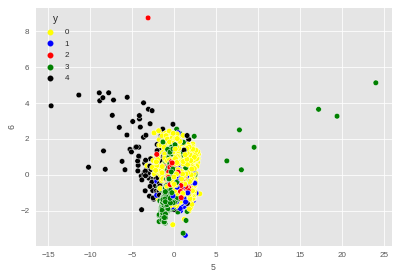

In [ ]:
### Applying Clustering and visualizing the spread of the data (finding out if the data points have been clustered correctly through visualization)

#K-Means Clusters:   For K= 5
kmeans = KMeans(n_clusters = 5, n_init = 100, init='k-means++', random_state = 0)
kmeans.fit(X_PCA_7)

# Taking into each dataframes
df_pca = pd.DataFrame(X_PCA_7)
y_lab = pd.Series(kmeans.labels_, name = 'y') # labels for clusters

#concatenating the dataframe:
df_final = pd.concat([df_pca, y_lab], axis = 1)

# As there are 7 dimensions, hence we need to plot for each of the different pairs to visualize the spread of the data:

for i in range(6):
    print('Scatter plot for Principal Components', i, 'and', i+1)
    sns.scatterplot(df_pca[i], df_pca[i+1], hue = df_final['y'], palette = ['yellow', 'blue', 'red', 'green','black'])
    plt.show()

In [ ]:
# Step 1: Making K-Means Cluster and Labels for finding out the distribution of Segments and then performing Profiling

# K = 3

km_3 = KMeans(n_clusters = 3, n_init = 100, init='k-means++', random_state = 0)             
KM_3 = km_3.fit(X_PCA_7)

In [ ]:
# Labels of Cluster 3

KM_3.labels_

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
# Centroids for Cluster 3:

KM_3.cluster_centers_

array([[-1.76479658,  0.93587491,  0.13620598,  0.18538487,  0.04654055,
        -0.06395186,  0.23937914],
       [ 0.43005603, -0.99827666, -0.21376279, -0.15160496, -0.025684  ,
         0.01894025, -0.13917789],
       [ 3.79706665,  1.3431978 ,  0.49391727,  0.06497734, -0.03762582,
         0.12296967, -0.16269885]])

In [ ]:
KM_4 = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_5 = KMeans(n_clusters = 5, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_6 = KMeans(n_clusters = 6, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_7 = KMeans(n_clusters = 7, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_8 = KMeans(n_clusters = 8, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)

In [ ]:
# Appending the Cluster labels to the Original Data: (not to Standardized data)

original_df['cluster_3'] = KM_3.labels_
original_df['cluster_4'] = KM_4.labels_
original_df['cluster_5'] = KM_5.labels_
original_df['cluster_6'] = KM_6.labels_
original_df['cluster_7'] = KM_7.labels_
original_df['cluster_8'] = KM_8.labels_

In [ ]:
# the new data set has Original variables + the Cluster Labels from each of the clusters got from K-Means

original_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,1,0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,1,2,3,2,2,0
1,0,1,0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,0,1,2,1,5,3
2,0,0,1,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,1,0,0,4,6,5
3,0,0,1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12,124.916667,17.149001,0.222223,0.000000,1,2,3,2,2,0
4,0,0,1,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,2,2,1,5,3


In [ ]:
# Finding the Segment Distribution for cluster K = 3 :

pd.Series.sort_index(original_df.cluster_3.value_counts())/sum(original_df.cluster_3.value_counts())

0    0.375237
1    0.507990
2    0.116773
Name: cluster_3, dtype: float64

In [ ]:
# Segment Distribution for cluster K = 4 :

pd.Series.sort_index(original_df.cluster_4.value_counts())/sum(original_df.cluster_4.value_counts())

0    0.385741
1    0.138339
2    0.435132
3    0.040787
Name: cluster_4, dtype: float64

In [ ]:
# Segment Distribution for cluster K = 5 :

pd.Series.sort_index(original_df.cluster_5.value_counts())/sum(original_df.cluster_5.value_counts())

0    0.363169
1    0.095430
2    0.338474
3    0.167728
4    0.035199
Name: cluster_5, dtype: float64

In [ ]:
# Segment Distribution for cluster K = 6 :

pd.Series.sort_index(original_df.cluster_6.value_counts())/sum(original_df.cluster_6.value_counts())

0    0.035199
1    0.337691
2    0.168063
3    0.095206
4    0.363057
5    0.000782
Name: cluster_6, dtype: float64

In [ ]:
# Segment Distribution for cluster K = 7 :

pd.Series.sort_index(original_df.cluster_7.value_counts())/sum(original_df.cluster_7.value_counts())

0    0.256341
1    0.092748
2    0.159906
3    0.000782
4    0.011510
5    0.328975
6    0.149737
Name: cluster_7, dtype: float64

In [ ]:
# Segment Distribution for cluster K = 8 :

pd.Series.sort_index(original_df.cluster_8.value_counts())/sum(original_df.cluster_8.value_counts())

0    0.156554
1    0.048721
2    0.089395
3    0.319365
4    0.000782
5    0.129065
6    0.252989
7    0.003129
Name: cluster_8, dtype: float64

In [ ]:
# Step 1a: Get the total size of the cluster:
original_df.cluster_3.size

# Step 1b: Get the break up of the values in each segment:
# which gives how many observations are there in each of the respective segment:

original_df.cluster_3.value_counts()

1    4546
0    3358
2    1045
Name: cluster_3, dtype: int64

In [ ]:
# by using the Sort Index provides:
# the value counts based on the Segment Label (0,1,2 depending upon the K-value) in the index
# and not based on the highest value within the segments

pd.Series.sort_index(original_df.cluster_3.value_counts())

0    3358
1    4546
2    1045
Name: cluster_3, dtype: int64

In [ ]:
# combining the size for each cluster K value into one single array:

size=pd.concat([pd.Series(original_df.cluster_3.size), pd.Series.sort_index(original_df.cluster_3.value_counts()), pd.Series.sort_index(original_df.cluster_4.value_counts()),
           pd.Series.sort_index(original_df.cluster_5.value_counts()), pd.Series.sort_index(original_df.cluster_6.value_counts()),
           pd.Series.sort_index(original_df.cluster_7.value_counts()), pd.Series.sort_index(original_df.cluster_8.value_counts())])

In [ ]:
# Gives the size of Segments for each of the Clusters :

size

0    8949
0    3358
1    4546
2    1045
0    3452
1    1238
2    3894
3     365
0    3250
1     854
2    3029
3    1501
4     315
0     315
1    3022
2    1504
3     852
4    3249
5       7
0    2294
1     830
2    1431
3       7
4     103
5    2944
6    1340
0    1401
1     436
2     800
3    2858
4       7
5    1155
6    2264
7      28
dtype: int64

In [ ]:
# Segment Size:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])

# Segment Distribtuion % wise:
Seg_Pct = pd.DataFrame(size/original_df.cluster_3.size, columns=['Seg_Pct'])

In [ ]:
# Taking Transpose of Segment Percentage :
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.375237,0.50799,0.116773,0.385741,0.138339,0.435132,0.040787,0.363169,0.09543,0.338474,0.167728,0.035199,0.035199,0.337691,0.168063,0.095206,0.363057,0.000782,0.256341,0.092748,0.159906,0.000782,0.01151,0.328975,0.149737,0.156554,0.048721,0.089395,0.319365,0.000782,0.129065,0.252989,0.003129


In [ ]:
# Concatenating the Segment Size and Segment Percentage:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
Seg_size,8949.0,3358.000000,4546.00000,1045.000000,3452.000000,1238.000000,3894.000000,365.000000,3250.000000,854.00000,3029.000000,1501.000000,315.000000,315.000000,3022.000000,1504.000000,852.000000,3249.000000,7.000000,2294.000000,830.000000,1431.000000,7.000000,103.00000,2944.000000,1340.000000,1401.000000,436.000000,800.000000,2858.000000,7.000000,1155.000000,2264.000000,28.000000
Seg_Pct,1.0,0.375237,0.50799,0.116773,0.385741,0.138339,0.435132,0.040787,0.363169,0.09543,0.338474,0.167728,0.035199,0.035199,0.337691,0.168063,0.095206,0.363057,0.000782,0.256341,0.092748,0.159906,0.000782,0.01151,0.328975,0.149737,0.156554,0.048721,0.089395,0.319365,0.000782,0.129065,0.252989,0.003129


In [ ]:
# Overall each variables wise Avg:
original_df.apply(np.mean).T

Installment_Purchases                  0.252542
None_Of_the_Purchases                  0.228070
One_Of_Purchase                        0.209409
BALANCE                             1564.647593
BALANCE_FREQUENCY                      0.877350
PURCHASES                           1003.316936
ONEOFF_PURCHASES                     592.503572
INSTALLMENTS_PURCHASES               411.113579
CASH_ADVANCE                         978.959616
PURCHASES_FREQUENCY                    0.490405
ONEOFF_PURCHASES_FREQUENCY             0.202480
PURCHASES_INSTALLMENTS_FREQUENCY       0.364478
CASH_ADVANCE_FREQUENCY                 0.135141
CASH_ADVANCE_TRX                       3.249078
PURCHASES_TRX                         14.711476
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.336511
MINIMUM_PAYMENTS                     845.003358
PRC_FULL_PAYMENT                       0.153732
TENURE                                11.517935
Monthly_Avg_Purchase                  86

In [ ]:
# Grouping-by over each cluster to find the Segment wise average for each variable
original_df.groupby('cluster_3').apply(np.mean).T

cluster_3,0,1,2
Installment_Purchases,0.073258,0.439067,0.017225
None_Of_the_Purchases,0.565515,0.031236,0.000000
One_Of_Purchase,0.252531,0.208755,0.073684
BALANCE,2504.779770,672.690120,2423.857947
BALANCE_FREQUENCY,0.944531,0.803102,0.984468
PURCHASES,221.712067,720.561518,4744.977493
ONEOFF_PURCHASES,164.722534,331.415458,3102.929694
INSTALLMENTS_PURCHASES,57.142716,389.491912,1642.621962
CASH_ADVANCE,2172.651223,163.805328,689.270600
PURCHASES_FREQUENCY,0.149574,0.635632,0.953860


In [ ]:
# Concatinating the above two averages:

Profiling_output = pd.concat([original_df.apply(lambda x: x.mean()).T, 
                original_df.groupby('cluster_3').apply(lambda x: x.mean()).T, 
                original_df.groupby('cluster_4').apply(lambda x: x.mean()).T,
                original_df.groupby('cluster_5').apply(lambda x: x.mean()).T, 
                original_df.groupby('cluster_6').apply(lambda x: x.mean()).T,
                original_df.groupby('cluster_7').apply(lambda x: x.mean()).T, 
                original_df.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

In [ ]:
Profiling_output

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
Installment_Purchases,0.252542,0.073258,0.439067,0.017225,0.420336,0.087237,0.177709,0.024658,0.383077,0.088993,0.117200,0.383078,0.028571,0.028571,0.116810,0.382979,0.089202,0.382271,0.571429,0.603749,0.085542,0.352900,0.571429,0.038835,0.098845,0.000000,0.359029,0.018349,0.087500,0.101120,0.571429,0.000000,0.611307,0.071429
None_Of_the_Purchases,0.228070,0.565515,0.031236,0.000000,0.000000,0.487884,0.369029,0.000000,0.000000,0.435597,0.461208,0.181213,0.000000,0.000000,0.462608,0.179521,0.434272,0.000000,0.428571,0.000000,0.445783,0.190077,0.428571,0.000000,0.474185,0.000000,0.192719,0.000000,0.438750,0.495801,0.428571,0.000000,0.000000,0.000000
One_Of_Purchase,0.209409,0.252531,0.208755,0.073684,0.077926,0.209208,0.337956,0.082192,0.084923,0.210773,0.303400,0.315123,0.082540,0.082540,0.302780,0.315824,0.211268,0.085565,0.000000,0.000000,0.210843,0.330538,0.000000,0.077670,0.306046,0.236567,0.325482,0.036697,0.212500,0.290413,0.000000,0.346320,0.000000,0.071429
BALANCE,1564.647593,2504.779770,672.690120,2423.857947,1004.708685,3747.504954,1204.228343,3301.645543,1070.898198,3996.276660,1927.641076,131.989130,3402.702829,3402.702829,1931.275248,132.206882,4001.305731,1072.915330,1.796679,940.651246,4008.931884,132.222079,1.796679,4090.177368,1933.950087,1651.271782,128.648840,3108.876916,4019.903812,1961.650370,1.796679,1259.880039,895.540620,5761.648320
BALANCE_FREQUENCY,0.877350,0.944531,0.803102,0.984468,0.930650,0.962854,0.792674,0.986618,0.965694,0.956709,0.975869,0.419304,0.985994,0.985994,0.975966,0.422565,0.956901,0.966048,0.277597,0.951917,0.956598,0.411249,0.277597,0.977846,0.975992,0.977054,0.404697,0.988039,0.955932,0.975299,0.277597,0.968639,0.951115,0.980195
PURCHASES,1003.316936,221.712067,720.561518,4744.977493,1259.336874,429.449588,287.402797,8166.156959,1367.077105,548.300609,257.379974,351.054077,8764.755048,8764.755048,256.398739,350.582939,549.587700,1367.942662,425.322857,923.050697,520.464229,336.110287,425.322857,14516.761456,242.880126,2787.315709,323.704682,5930.758440,518.998575,212.513212,425.322857,1863.825091,902.325645,25651.435714
ONEOFF_PURCHASES,592.503572,164.722534,331.415458,3102.929694,600.426330,281.872876,227.197260,5468.432959,676.677517,353.967307,206.355655,215.337109,5881.118032,5881.118032,205.663683,215.640153,354.798216,677.634894,0.000000,174.424263,332.384470,219.653347,0.000000,9530.262233,199.918655,2046.122858,207.672291,3643.225046,332.685262,169.458275,0.000000,1523.492199,174.940808,18455.715357
INSTALLMENTS_PURCHASES,411.113579,57.142716,389.491912,1642.621962,659.256222,147.658837,60.408844,2699.367836,690.674815,194.373958,51.308445,135.914704,2885.541778,2885.541778,51.019841,135.140126,194.830235,690.583081,425.322857,749.277912,188.121590,116.664347,425.322857,4986.499223,43.253801,741.192851,116.244240,2288.909541,186.356712,43.239216,425.322857,340.622026,727.779929,7195.720357
CASH_ADVANCE,978.959616,2172.651223,163.805328,689.270600,245.541464,4297.343032,612.632584,568.215104,261.965004,5116.205209,934.873755,347.803371,591.424217,591.424217,938.364106,345.336374,5122.469655,262.241719,417.321256,270.797994,5163.523194,361.136687,417.321256,961.770545,945.939496,335.939302,360.562364,568.267969,5230.097128,992.864752,417.321256,293.970067,266.248348,1459.599916
PURCHASES_FREQUENCY,0.490405,0.149574,0.635632,0.953860,0.883502,0.257225,0.172857,0.951344,0.897408,0.308017,0.160371,0.282740,0.948753,0.948753,0.159336,0.282896,0.308740,0.897633,0.476190,0.877397,0.293262,0.262562,0.476190,0.932686,0.148350,0.910903,0.256652,0.961140,0.296724,0.131488,0.476190,0.845917,0.879118,0.933929


In [ ]:
# Combining the outputs from steps 1 and 2: 
# Concatenating the segment size, segment distribution, the overall averages, and the individual segment-wise average 

Profiling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

# Adding column names

Profiling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [ ]:
Profling_output_final

In [ ]:
# Exporting the output:
Profiling_output_final.to_csv('Profiling_output_final.csv')

In [ ]:
# Predicting for the new data using the 5 clusters class
KM_5.predict(concat_new_cust)

In [252]:
# adding Segment or Group to the data as column:
new_customer_data['Segment'] = KM_5.predict(concat_new_cust)

In [252]:
new_customer_data